# Parameter Recovery and Model Recovery

In [46]:
%load_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib notebook

import numpy as np
from run_model_recovery import *
    
# Parameter settings
n_trials = 1000
n_models = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Paremeter Recovery

### 1.1 LossCounting

If we allow loss_count_threshold_std

Parameter Recovery, LossCounting: 100%|██████████████████████████████████████████████| 100/100 [11:07<00:00,  6.68s/it]


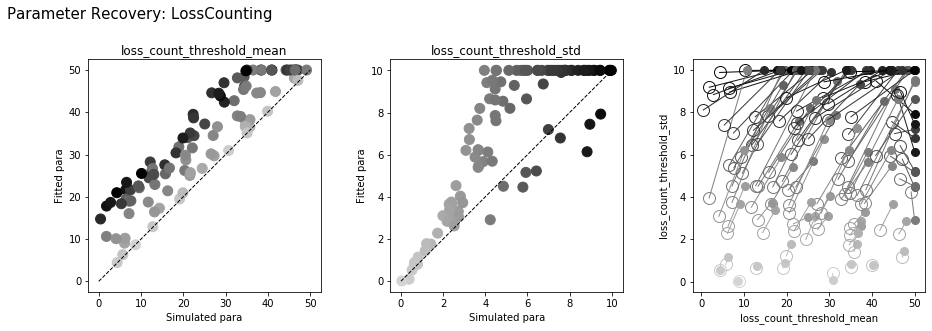

In [47]:
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

simulated_para, fitted_para = fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  n_models = n_models, n_trials = n_trials)
plot_para_recovery(forager, simulated_para, fitted_para, para_names, para_bounds)

If we fix threshold_std = 0, much better

Parameter Recovery, LossCounting: 100%|██████████████████████████████████████████████| 100/100 [09:35<00:00,  5.76s/it]


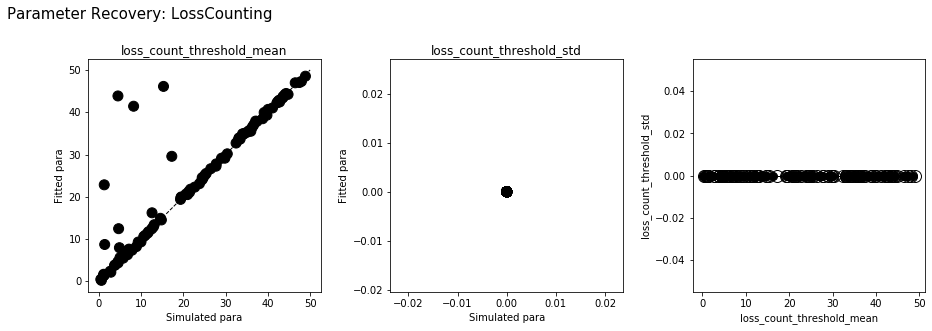

In [48]:
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,0]]

simulated_para, fitted_para = fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  n_models = n_models, n_trials = n_trials)
plot_para_recovery(forager, simulated_para, fitted_para, para_names, para_bounds)